# TWITTER-SENTIMENT-ANALYSIS

# **import the libraries**

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt




# **Authenticate to twitter**

In [5]:
 #twitter API authentication Credentials
consumerKey = "dtMj7rmhwHhm3c0PEhGRGrGUA"
consumerSecret = "ludAxnKewbezQp23UqIaX5l5j9Wqvcl7hrv97jkpaKP2agEEmX"
accessToken = "409269998-eDjtBphtXyxotwhl3QsgL4UCDglGGsmk6edDnwKw"
accessTokenSecret = "kKJkSykHHD2TKndM5ijwMyyMO02v5J7AekUWbAyrQwoe8"

#create the authencation object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [6]:
df = pd.DataFrame(columns = ['Tweets'])

# **Extract and Analyze the data of Flipkart**

In [7]:
def stream(data):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        i+=1
        if i == 3000:
            break
        else:
            pass

In [8]:
stream(data = ['Flipkart'])
print(df)

                                                 Tweets
0     RT @FlipkartStories: “We take stuff from the g...
1     @Flipkart What the f... flipkart not deliverin...
2     Get ready to step out in style. This Bulchee p...
3     @SudhakarDommu @Flipkart @flipkartsupport Stra...
4     RT @FlipkartStories: “We take stuff from the g...
...                                                 ...
2995  It is request to Flipkart for not listing such...
2996  @Flipkart @flipkartsupport @ASUSIndia  I purch...
2997  @_Kalyan_K @Flipkart @flipkartsupport @consaff...
2998  @flipkartsupport Another 3 days have been pass...
2999  Good bye @Flipkart @flipkartsupport , hope I d...

[3000 rows x 1 columns]


# **Clean the Data**

In [9]:
def cleanTxt(text):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ',text).split())

In [10]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,RT We take stuff from the ground we make somet...
1,What the f flipkart not delivering any electro...
2,Get ready to step out in style This Bulchee pr...
3,Strange
4,RT We take stuff from the ground we make somet...
...,...
2995,It is request to Flipkart for not listing such...
2996,I purchased Asus Zenfone Max Pro M2 from flipk...
2997,Kalyan K How can I be denied a product exchang...
2998,Another 3 days have been passed yet no resolut...


# **Calculate the Subjectivity and Polarity**

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,To ensure that your Flipkart account informati...,0.5,0.5000
1,Oi Flipkart why are items not able to be deliv...,0.5,-0.1875
2,Dear takecare of your customers,0.0,0.0000
3,RT Dear flipkart team u recived my order id th...,0.2,0.2000
4,Orient Electric Ujala 1200 mm Energy Saving 3 ...,1.0,0.0000
...,...,...,...
2995,You can track your order anytime from your My ...,0.2,0.2000
2996,To ensure that your Flipkart account informati...,0.5,0.5000
2997,realmeNarzo10A is the choice of every young pl...,0.7,0.0500
2998,Remember Flipkart s Nokia TVs They are back,0.0,0.0000


# **Analyze the Sentiments**

In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,To ensure that your Flipkart account informati...,0.5,0.5000,Positive
1,Oi Flipkart why are items not able to be deliv...,0.5,-0.1875,Negative
2,Dear takecare of your customers,0.0,0.0000,Neutral
3,RT Dear flipkart team u recived my order id th...,0.2,0.2000,Positive
4,Orient Electric Ujala 1200 mm Energy Saving 3 ...,1.0,0.0000,Neutral
...,...,...,...,...
2995,You can track your order anytime from your My ...,0.2,0.2000,Positive
2996,To ensure that your Flipkart account informati...,0.5,0.5000,Positive
2997,realmeNarzo10A is the choice of every young pl...,0.7,0.0500,Positive
2998,Remember Flipkart s Nokia TVs They are back,0.0,0.0000,Neutral


# **WordCloud of the Flipkart Data**

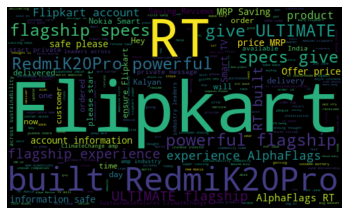

In [14]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Scatter Plot of subjectivity vs polarity** 

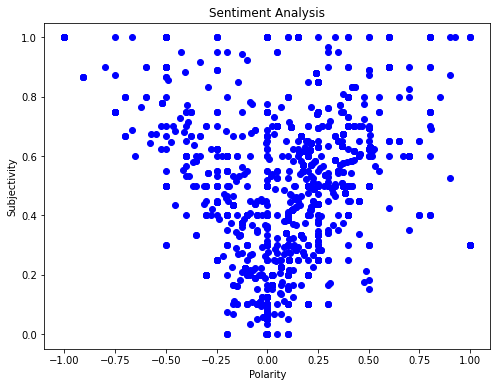

In [15]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# **Calculating the percentages of the sentiments**

In [16]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

41.7

In [17]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


16.3

In [18]:
# Print the percentage of neutral tweets
nntweets = df[df.Analysis == 'Neutral']
nntweets = nntweets['Tweets']
nntweets

round( (nntweets.shape[0] / df.shape[0]) * 100, 1)


42.1

In [19]:
# Show the value counts
df['Analysis'].value_counts()


Neutral     1262
Positive    1250
Negative     488
Name: Analysis, dtype: int64

# **Plotting the graph of the sentiments**

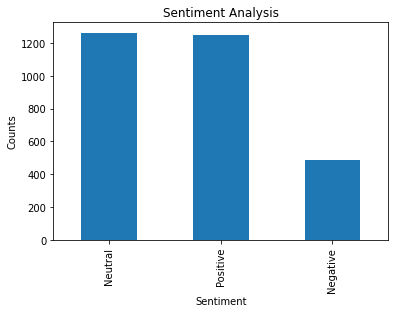

In [20]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Extracting the tweets for amazon

In [0]:
df1 = pd.DataFrame(columns = ['Tweets'])

In [0]:
def stream(data):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df1.loc[i, 'Tweets'] = tweet.text
        i+=1
        if i == 3000:
            break
        else:
            pass

In [44]:
stream(data = ['Amazonin'])
print(df1)

                                                 Tweets
0     @RedmiIndia @amazonIN When do you launch redmi...
1     #AmazonBlogQuiz\n#amazonIN\nEligible to win 10...
2     RT @Snehasis: @tanmays @amazonIN @amazonIN @Am...
3     RT @Snehasis: Bought a new graphics card Galax...
4     @amazonIN @amazon \nRanchi , jharkhand is unde...
...                                                 ...
2995  RT @RedmiIndia: 📢 #RedmiNote9ProMax SALE ALERT...
2996  RT @RedmiIndia: A flagship on your mind? Get t...
2997  RT @RedmiIndia: A flagship on your mind? Get t...
2998  RT @RedmiIndia: 📢 #RedmiNote9ProMax SALE ALERT...
2999  RT @RedmiIndia: 📢 #RedmiNote9ProMax SALE ALERT...

[3000 rows x 1 columns]


# Cleaning the tweets

In [45]:
def cleanTxt(text):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ',text).split())

df1['Tweets'] = df1['Tweets'].apply(cleanTxt)
df1

,Tweets
0,When do you launch redmi note 10 pro
1,AmazonBlogQuiz amazonIN Eligible to win 10 000...
2,RT can you please help here with this Escalati...
3,RT Bought a new graphics card Galax 2070 super...
4,Ranchi jharkhand is under orange zone So when ...
...,...
2995,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...
2996,RT A flagship on your mind Get the RedmiK20 se...
2997,RT A flagship on your mind Get the RedmiK20 se...
2998,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...


# calculating the subjectivity and Polarity

In [46]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df1['Subjectivity'] = df1['Tweets'].apply(getSubjectivity)
df1['Polarity'] = df1['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df1

,Tweets,Subjectivity,Polarity
0,When do you launch redmi note 10 pro,0.000000,0.000000
1,AmazonBlogQuiz amazonIN Eligible to win 10 000...,0.400000,0.800000
2,RT can you please help here with this Escalati...,0.000000,0.000000
3,RT Bought a new graphics card Galax 2070 super...,0.440404,0.189899
4,Ranchi jharkhand is under orange zone So when ...,0.000000,0.000000
...,...,...,...
2995,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...,0.500000,0.500000
2996,RT A flagship on your mind Get the RedmiK20 se...,0.000000,0.000000
2997,RT A flagship on your mind Get the RedmiK20 se...,0.000000,0.000000
2998,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...,0.500000,0.500000


# Analyze the Sentiments

In [49]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
# Show the dataframe
df1


,Tweets,Subjectivity,Polarity,Analysis
0,When do you launch redmi note 10 pro,0.000000,0.000000,Neutral
1,AmazonBlogQuiz amazonIN Eligible to win 10 000...,0.400000,0.800000,Positive
2,RT can you please help here with this Escalati...,0.000000,0.000000,Neutral
3,RT Bought a new graphics card Galax 2070 super...,0.440404,0.189899,Positive
4,Ranchi jharkhand is under orange zone So when ...,0.000000,0.000000,Neutral
...,...,...,...,...
2995,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...,0.500000,0.500000,Positive
2996,RT A flagship on your mind Get the RedmiK20 se...,0.000000,0.000000,Neutral
2997,RT A flagship on your mind Get the RedmiK20 se...,0.000000,0.000000,Neutral
2998,RT RedmiNote9ProMax SALE ALERT Grab our MOST r...,0.500000,0.500000,Positive


# wordcloud for amazon

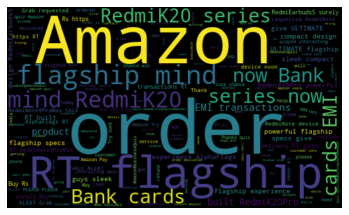

In [53]:
# word cloud visualization
allWords = ' '.join([twts for twts in df1['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# scatter plot for Subjectivity vs polarity

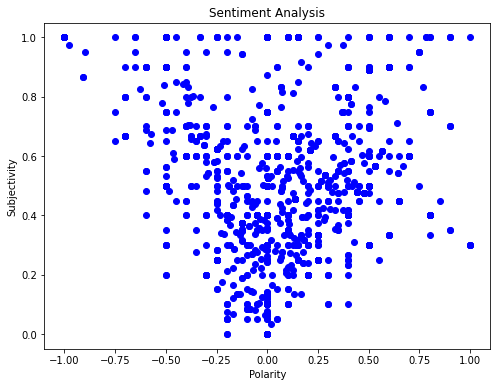

In [54]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df1.shape[0]):
  plt.scatter(df1["Polarity"][i], df1["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Calculating the percentages of sentiments

In [55]:
# Print the percentage of positive tweets
ptweets = df1[df1.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df1.shape[0]) * 100 , 1)

41.5

In [56]:
# Print the percentage of negative tweets
ntweets = df1[df1.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df1.shape[0]) * 100, 1)

15.2

In [57]:
# Print the percentage of neutral tweets
nntweets = df1[df1.Analysis == 'Neutral']
nntweets = nntweets['Tweets']
nntweets

round( (nntweets.shape[0] / df1.shape[0]) * 100, 1)


43.4

In [59]:
# Show the value counts
df1['Analysis'].value_counts()

Neutral     1301
Positive    1244
Negative     455
Name: Analysis, dtype: int64

# plotting the graph for sentiments

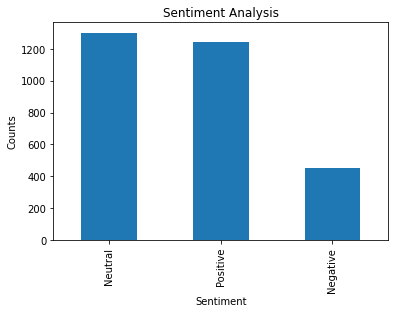

In [60]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Extracting the tweets for snapdeal

In [0]:
df2 = pd.DataFrame(columns = ['Tweets'])

In [0]:
def stream(data):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df2.loc[i, 'Tweets'] = tweet.text
        i+=1
        if i == 3000:
            break
        else:
            pass

In [76]:
stream(data = ['Snapdeal'])
print(df2)

                                                 Tweets  ...  Analysis
0     @AsimAli6 @ashoswai The last time he spoke up,...  ...  Positive
1     @AsimAli6 @ashoswai Then he was boycotted and ...  ...   Neutral
2     RT @Si_lv_er: Chinese investors have funded BY...  ...   Neutral
3     RT @ananthkrishnan: If we are speaking of dele...  ...  Positive
4     @sudhirchaudhary @sundarpichai All Chinese App...  ...   Neutral
...                                                 ...  ...       ...
2995  @rmehrotra1 @PMOIndia @realDonaldTrump @INCInd...  ...   Neutral
2996  RT @t_d_h_nair: Chinese Group Alibaba holds ar...  ...  Negative
2997  RT @t_d_h_nair: Chinese Group Alibaba holds ar...  ...  Negative
2998  RT @t_d_h_nair: Chinese Group Alibaba holds ar...  ...  Negative
2999  RT @t_d_h_nair: Chinese Group Alibaba holds ar...  ...  Negative

[3000 rows x 4 columns]


# Cleaning the tweets

In [77]:
def cleanTxt(text):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ',text).split())

df2['Tweets'] = df2['Tweets'].apply(cleanTxt)
df2

,Tweets,Subjectivity,Polarity,Analysis
0,The last time he spoke up Snapdeal a company h...,0.233333,0.050000,Positive
1,Then he was boycotted and Snapdeal cancelled h...,0.000000,0.000000,Neutral
2,RT lv er Chinese investors have funded BYJU s ...,0.050000,0.000000,Neutral
3,RT If we are speaking of deleting Chinese apps...,0.166667,0.020833,Positive
4,All Chinese Apps have been removed but who wil...,0.000000,0.000000,Neutral
...,...,...,...,...
2995,,0.000000,0.000000,Neutral
2996,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2997,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2998,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative


# calculating the subjectivity and polarity of sentiments

In [78]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df2['Subjectivity'] = df2['Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df2

,Tweets,Subjectivity,Polarity,Analysis
0,The last time he spoke up Snapdeal a company h...,0.233333,0.050000,Positive
1,Then he was boycotted and Snapdeal cancelled h...,0.000000,0.000000,Neutral
2,RT lv er Chinese investors have funded BYJU s ...,0.050000,0.000000,Neutral
3,RT If we are speaking of deleting Chinese apps...,0.166667,0.020833,Positive
4,All Chinese Apps have been removed but who wil...,0.000000,0.000000,Neutral
...,...,...,...,...
2995,,0.000000,0.000000,Neutral
2996,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2997,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2998,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative


# analyzing the sentiments

In [79]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)
# Show the dataframe
df2


,Tweets,Subjectivity,Polarity,Analysis
0,The last time he spoke up Snapdeal a company h...,0.233333,0.050000,Positive
1,Then he was boycotted and Snapdeal cancelled h...,0.000000,0.000000,Neutral
2,RT lv er Chinese investors have funded BYJU s ...,0.050000,0.000000,Neutral
3,RT If we are speaking of deleting Chinese apps...,0.166667,0.020833,Positive
4,All Chinese Apps have been removed but who wil...,0.000000,0.000000,Neutral
...,...,...,...,...
2995,,0.000000,0.000000,Neutral
2996,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2997,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative
2998,RT d h nair Chinese Group Alibaba holds around...,0.071429,-0.023810,Negative


# Wordcloud for Snapdeal

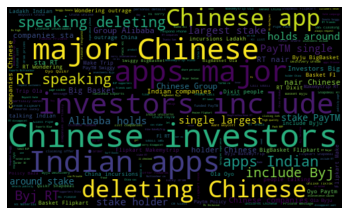

In [80]:
# word cloud visualization
allWords = ' '.join([twts for twts in df2['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# scatter plot for subjectivity vs polarity

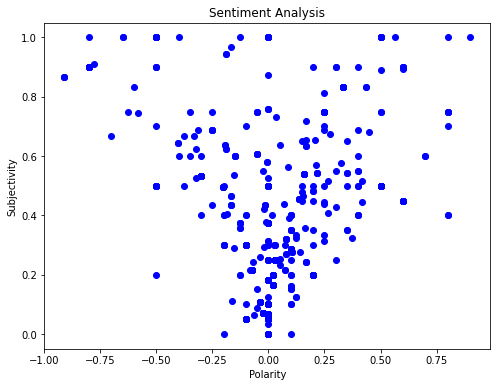

In [81]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df2.shape[0]):
  plt.scatter(df2["Polarity"][i], df2["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Calculating the percentages of sentiments

In [82]:
# Print the percentage of positive tweets
ptweets = df2[df2.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df2.shape[0]) * 100 , 1)

49.3

In [83]:
# Print the percentage of negative tweets
ntweets = df2[df2.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df2.shape[0]) * 100, 1)

23.6

In [86]:
# Print the percentage of neutral tweets
nntweets = df2[df2.Analysis == 'Neutral']
nntweets = nntweets['Tweets']
nntweets

round( (nntweets.shape[0] / df2.shape[0]) * 100, 1)

27.2

In [87]:
# Show the value counts
df2['Analysis'].value_counts()

Positive    1478
Neutral      815
Negative     707
Name: Analysis, dtype: int64

# plotting the graph of sentiments

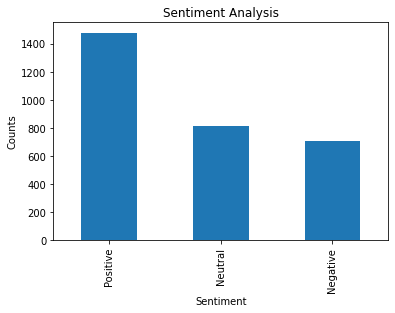

In [88]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis'].value_counts().plot(kind = 'bar')
plt.show()